# Image Classification of the CIFAR-10 dataset

In [16]:
#loading in libraries 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

## Extracting and Preprocessing Data

In [17]:
#Splitting data into testing and training sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
# currently a 2 dimension array, each number represents its corresponding class 
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
#reshaping into a 1 dimensional array 
y_train = y_train.reshape(-1,)
y_train[:5]
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

### Plotting images from the dataset

In [22]:
classes = ['airplane', "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

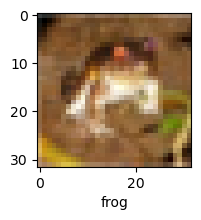

In [24]:
plot_sample(X_train, y_train, 0)

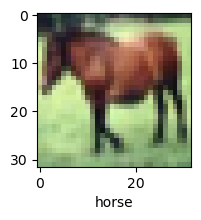

In [25]:
plot_sample(X_train, y_train, 7)

In [26]:
#normalising all the values for an image between 0 and 1. Every image will have a value between 0 and 255, thus dividing it by 255 will normalise all of the data.
X_train = X_train/255
X_test = X_test/255

## ANN

An Artificial Neural Network (ANN) is a type of machine learning algorithm that is loosely modeled after the structure and function of the human brain. It is composed of a large number of interconnected nodes, called neurons, that process and transmit information.

The basic building block of an ANN is the neuron, which takes in one or more inputs, performs a weighted sum of those inputs, and applies an activation function to produce an output. The output of one neuron can then be used as input to one or more other neurons in the network. By arranging the neurons in multiple layers, with each layer processing the output of the previous layer, an ANN can learn to represent complex patterns in the input data.

There are several different types of ANN architectures, including feedforward neural networks, recurrent neural networks, and convolutional neural networks. Feedforward neural networks are the simplest type and are often used for tasks such as classification and regression. Recurrent neural networks are designed to handle sequential data, such as speech and natural language, and can be used for tasks such as language translation and speech recognition. Convolutional neural networks are designed specifically for image recognition and classification tasks and are composed of convolutional layers, pooling layers, and fully connected layers.

ANNs have several key advantages for machine learning tasks. First, they are able to learn complex patterns in the input data, even when the relationships between the inputs and outputs are nonlinear. Second, they can automatically learn and extract features from the input data, without the need for manual feature engineering. Third, they are able to generalize to new, unseen data, making them useful for predictive modeling.

ANNs have been used in a wide variety of applications, including image recognition, speech recognition, natural language processing, and predictive modeling in finance and healthcare. They have achieved state-of-the-art performance in many tasks, often surpassing human-level accuracy.

In [27]:
#Building a ANN (Artificial Neural Network)
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(5000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

# ann2 contains 4 more dense layers 
ann2 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(5000, activation='relu'),
    layers.Dense(5000, activation='relu'),
    layers.Dense(5000, activation='relu'),
    layers.Dense(5000, activation='relu'),
    layers.Dense(5000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

In [28]:
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann2.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [90]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 5000)              15365000  
                                                                 
 dense_11 (Dense)            (None, 5000)              25005000  
                                                                 
 dense_12 (Dense)            (None, 10)                50010     
                                                                 
Total params: 40,420,010
Trainable params: 40,420,010
Non-trainable params: 0
_________________________________________________________________


In [91]:
ann2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 5000)              15365000  
                                                                 
 dense_14 (Dense)            (None, 5000)              25005000  
                                                                 
 dense_15 (Dense)            (None, 5000)              25005000  
                                                                 
 dense_16 (Dense)            (None, 5000)              25005000  
                                                                 
 dense_17 (Dense)            (None, 5000)              25005000  
                                                                 
 dense_18 (Dense)            (None, 5000)             

In [29]:
ann_hist = ann.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.7965 - accuracy: 0.3620 - val_loss: 1.6776 - val_accuracy: 0.4181
Epoch 2/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.6080 - accuracy: 0.4343 - val_loss: 1.6138 - val_accuracy: 0.4196
Epoch 3/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.5242 - accuracy: 0.4634 - val_loss: 1.5811 - val_accuracy: 0.4186
Epoch 4/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.4648 - accuracy: 0.4860 - val_loss: 1.4766 - val_accuracy: 0.4708
Epoch 5/5
1563/1563 [==============================] - 157s 101ms/step - loss: 1.4129 - accuracy: 0.5044 - val_loss: 1.4682 - val_accuracy: 0.4710


In [30]:
ann_hist2 = ann2.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 550s 350ms/step - loss: 1.8514 - accuracy: 0.3318 - val_loss: 1.6857 - val_accuracy: 0.3898
Epoch 2/5
1563/1563 [==============================] - 511s 327ms/step - loss: 1.6222 - accuracy: 0.4203 - val_loss: 1.5476 - val_accuracy: 0.4460
Epoch 3/5
1563/1563 [==============================] - 514s 329ms/step - loss: 1.5208 - accuracy: 0.4576 - val_loss: 1.4955 - val_accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 509s 326ms/step - loss: 1.4432 - accuracy: 0.4871 - val_loss: 1.5898 - val_accuracy: 0.4347
Epoch 5/5
1563/1563 [==============================] - 511s 327ms/step - loss: 1.3839 - accuracy: 0.5056 - val_loss: 1.4346 - val_accuracy: 0.4827


## ANN Performance Evaluation

In [31]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.4682 - accuracy: 0.4710


[1.4682464599609375, 0.47099998593330383]

In [32]:
 ann2.evaluate(X_test, y_test)

313/313 [==============================] - 19s 59ms/step - loss: 1.4346 - accuracy: 0.4827


[1.434614896774292, 0.482699990272522]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
#ann1
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

#ann2
y_pred2 = ann2.predict(X_test)
y_pred_classes_ann2 = [np.argmax(element) for element in y_pred2]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 17s 54ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.61      0.56      1000
           1       0.43      0.81      0.56      1000
           2       0.31      0.46      0.37      1000
           3       0.36      0.37      0.37      1000
           4       0.51      0.21      0.30      1000
           5       0.41      0.38      0.40      1000
           6       0.48      0.59      0.53      1000
           7       0.70      0.39      0.50      1000
           8       0.65      0.57      0.61      1000
           9       0.64      0.31      0.42      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



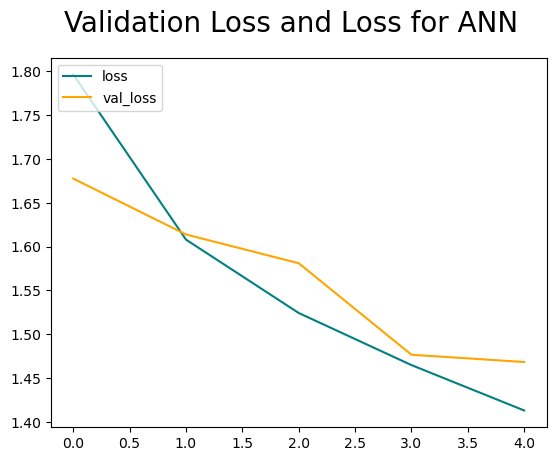

In [86]:
fig = plt.figure()
plt.plot(ann_hist.history['loss'], color='teal', label='loss')
plt.plot(ann_hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Validation Loss and Loss for ANN', fontsize=20)
plt.legend(loc="upper left")
plt.show()

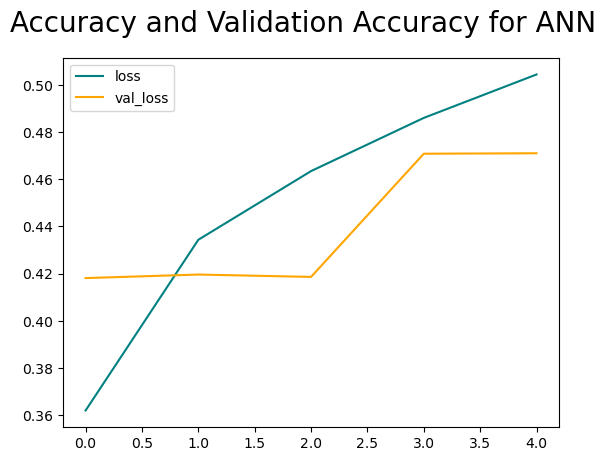

In [87]:
fig = plt.figure()
plt.plot(ann_hist.history['accuracy'], color='teal', label='loss')
plt.plot(ann_hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy and Validation Accuracy for ANN', fontsize=20)
plt.legend(loc="upper left")
plt.show()

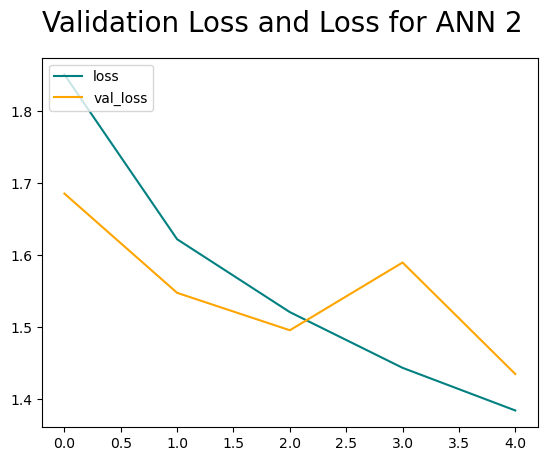

In [88]:
fig = plt.figure()
plt.plot(ann_hist2.history['loss'], color='teal', label='loss')
plt.plot(ann_hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Validation Loss and Loss for ANN 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

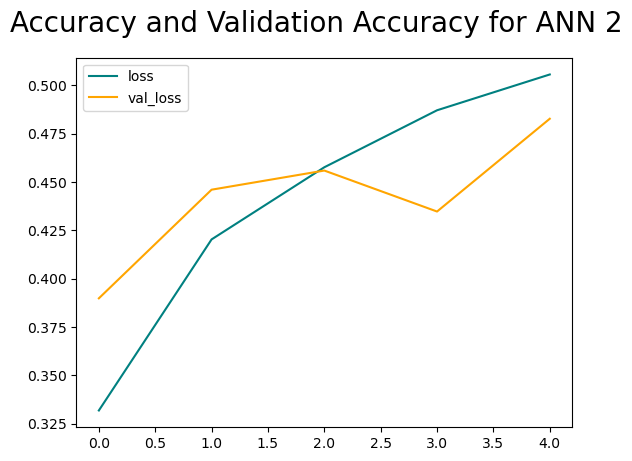

In [89]:
fig = plt.figure()
plt.plot(ann_hist2.history['accuracy'], color='teal', label='loss')
plt.plot(ann_hist2.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy and Validation Accuracy for ANN 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# CNN

Convolutional layers, pooling layers, and fully linked layers make up the fundamental components of a CNN. Convolutional layers apply filters to the incoming picture data to create a collection of feature maps that draw attention to key aspects of the image, such edges and textures. By combining nearby pixels into a single value, pooling layers assist to minimize the dimensionality of the feature maps, which helps to prevent overfitting and lower computational cost. In order to produce a prediction about the input picture, fully connected layers incorporate the information that were retrieved by the convolutional and pooling layers.

For image identification and classification applications, CNNs provide a number of significant benefits. They can first discover intricate patterns and characteristics in the input photos by learning hierarchical representations of image data. Second, they do not require human feature engineering since they can automatically learn and extract features from the raw picture data. Thirdly, they can withstand changes in the input pictures' orientation, size, and illumination.

Applications for CNNs include object detection, facial recognition, natural language processing, and self-driving automobiles, among many more. In several image identification tasks, they have reached state-of-the-art performance, frequently outperforming human accuracy.

In [71]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, activation="relu", input_shape=(32,32,3), kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, activation="relu", input_shape=(32,32,3), kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [72]:
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1152)              0         
                                                                 
 dense_32 (Dense)            (None, 64)              

In [73]:
# cnn2 contains 3 more layers of Conv2D and MaxPooling2D
cnn2 = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, activation="relu", input_shape=(32,32,3), kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, activation="relu", input_shape=(32,32,3), kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, activation="relu", input_shape=(32,32,3), kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

cnn2.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [74]:
cnn2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2, 32)       

In [75]:
# cnn with 
cnn_hist = cnn.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5064 - accuracy: 0.4565 - val_loss: 1.2585 - val_accuracy: 0.5569
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1862 - accuracy: 0.5816 - val_loss: 1.1493 - val_accuracy: 0.5973
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0570 - accuracy: 0.6301 - val_loss: 1.0657 - val_accuracy: 0.6315
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9755 - accuracy: 0.6603 - val_loss: 1.0059 - val_accuracy: 0.6527
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9223 - accuracy: 0.6795 - val_loss: 0.9809 - val_accuracy: 0.6626
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8796 - accuracy: 0.6935 - val_loss: 0.9453 - val_accuracy: 0.6773
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8364 - accuracy: 0.7077 - val_loss: 0.9426 - val_acc

In [76]:
cnn_hist2 = cnn2.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.5983 - accuracy: 0.4154 - val_loss: 1.3533 - val_accuracy: 0.5140
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2836 - accuracy: 0.5411 - val_loss: 1.1907 - val_accuracy: 0.5815
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1554 - accuracy: 0.5931 - val_loss: 1.1893 - val_accuracy: 0.5824
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0717 - accuracy: 0.6233 - val_loss: 1.0619 - val_accuracy: 0.6259
Epoch 5/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.0204 - accuracy: 0.6409 - val_loss: 1.0555 - val_accuracy: 0.6340
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9733 - accuracy: 0.6610 - val_loss: 1.0072 - val_accuracy: 0.6504
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9375 - accuracy: 0.6730 - val_loss: 1.0075 -

## CNN Performance Evaluation

In [77]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9282 - accuracy: 0.6832


[0.9281524419784546, 0.6832000017166138]

In [78]:
cnn2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9826 - accuracy: 0.6561


[0.9825748205184937, 0.6560999751091003]

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_cnn = cnn.predict(X_test)
y_pred_cnn2 = cnn2.predict(X_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
y_pred_classes_cnn2 = [np.argmax(element) for element in y_pred_cnn2]

313/313 [==============================] - 1s 2ms/step


In [80]:
print("Classification Report CNN 1: \n", classification_report(y_test, y_pred_classes_cnn)) 

Classification Report CNN 1: 
               precision    recall  f1-score   support

           0       0.69      0.70      0.69      1000
           1       0.83      0.77      0.80      1000
           2       0.58      0.54      0.56      1000
           3       0.52      0.49      0.51      1000
           4       0.64      0.66      0.65      1000
           5       0.65      0.49      0.56      1000
           6       0.69      0.86      0.76      1000
           7       0.78      0.69      0.73      1000
           8       0.69      0.86      0.77      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [81]:
print("Classification Report CNN 2: \n", classification_report(y_test, y_pred_classes_cnn2)) 

Classification Report CNN 2: 
               precision    recall  f1-score   support

           0       0.70      0.63      0.66      1000
           1       0.80      0.77      0.78      1000
           2       0.61      0.50      0.55      1000
           3       0.53      0.39      0.45      1000
           4       0.62      0.59      0.61      1000
           5       0.60      0.56      0.58      1000
           6       0.75      0.76      0.75      1000
           7       0.70      0.73      0.71      1000
           8       0.56      0.92      0.69      1000
           9       0.73      0.72      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



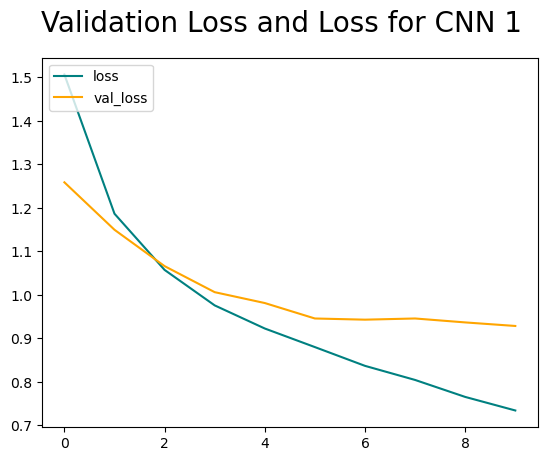

In [82]:
fig = plt.figure()
plt.plot(cnn_hist.history['loss'], color='teal', label='loss')
plt.plot(cnn_hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Validation Loss and Loss for CNN 1', fontsize=20)
plt.legend(loc="upper left")
plt.show()

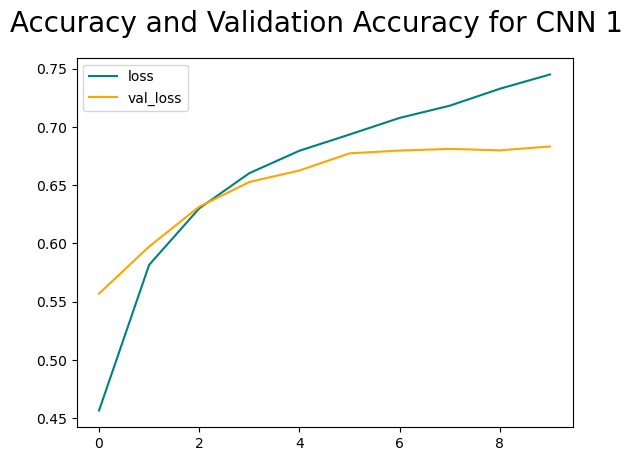

In [83]:
fig = plt.figure()
plt.plot(cnn_hist.history['accuracy'], color='teal', label='loss')
plt.plot(cnn_hist.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy and Validation Accuracy for CNN 1', fontsize=20)
plt.legend(loc="upper left")
plt.show()

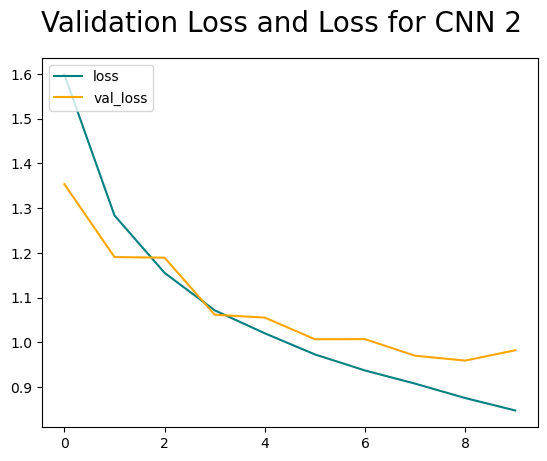

In [84]:
fig = plt.figure()
plt.plot(cnn_hist2.history['loss'], color='teal', label='loss')
plt.plot(cnn_hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Validation Loss and Loss for CNN 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

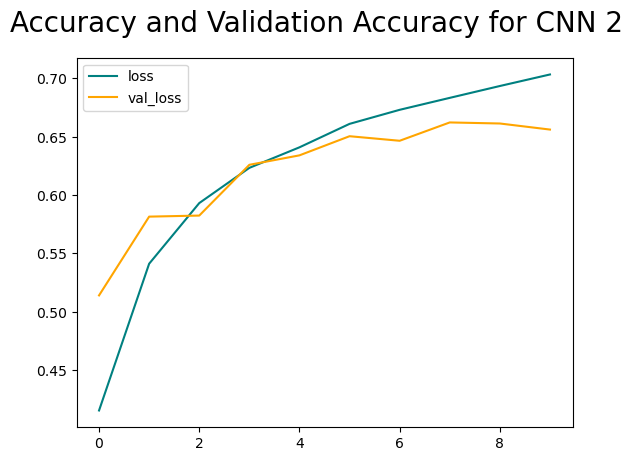

In [85]:
fig = plt.figure()
plt.plot(cnn_hist2.history['accuracy'], color='teal', label='loss')
plt.plot(cnn_hist2.history['val_accuracy'], color='orange', label='val_loss')
fig.suptitle('Accuracy and Validation Accuracy for CNN 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()